<a href="https://colab.research.google.com/github/DavidAMills/quickshift/blob/master/quickshift_felz_slic_compactwatershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install rasterio

     |████████████████████████████████| 15.1MB 2.7MB/s 


In [0]:
import matplotlib.pyplot as plt
import numpy as np

import rasterio
from rasterio import plot
from rasterio.plot import show
from rasterio.windows import Window

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

In [0]:
img = img_as_float(astronaut()[::2, ::2])
print(img.shape)
type(img)

(256, 256, 3)


numpy.ndarray

In [0]:
src = rasterio.open("image.tif")

x_corner = 2744
y_corner = 2744
x_inc = 512

image = [0,1,2,3]

# Loop through 3 image windows.
for i in range(3):
    if i < 1:
        image[i] = src.read([1,2,3], window = Window(x_corner, y_corner, x_inc, x_inc))
    else:
        x_corner = x_corner + x_inc
        image[i] = src.read([1,2,3], window = Window(x_corner, y_corner, x_inc, x_inc))
    print (image[i].shape)
    image[i] = np.transpose(image[i],[1,2,0])
    print(image[i].shape)
    image[3] = image[0]

(3, 512, 512)
(512, 512, 3)
(3, 512, 512)
(512, 512, 3)
(3, 512, 512)
(512, 512, 3)


In [0]:
def segment_image(img,f_scale,f_sigma,f_min_size,slic_segments,slic_compactness,slic_sigma,quick_size,quick_dist,quick_ratio,w_markers,w_compactness):
    segments_fz = felzenszwalb(img, scale=f_scale, sigma=f_sigma, min_size=f_min_size)
    segments_slic = slic(img, n_segments=slic_segments, compactness=slic_compactness, sigma=slic_sigma)
    segments_quick = quickshift(img, kernel_size=quick_size, max_dist=quick_dist, ratio=quick_ratio)
    gradient = sobel(rgb2gray(img))
    segments_watershed = watershed(gradient, markers=w_markers, compactness=w_compactness)
    
    print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")
    print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
    print(f"Quickshift number of segments: {len(np.unique(segments_quick))}")
    print(f"Compact Watershed number of segments: {len(np.unique(segments_watershed))}")
    
    fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

    ax[0, 0].imshow(mark_boundaries(img, segments_fz))
    ax[0, 0].set_title("Felzenszwalbs's method")
    ax[0, 1].imshow(mark_boundaries(img, segments_slic))
    ax[0, 1].set_title('SLIC')
    ax[1, 0].imshow(mark_boundaries(img, segments_quick))
    ax[1, 0].set_title('Quickshift')
    ax[1, 1].imshow(mark_boundaries(img, segments_watershed))
    ax[1, 1].set_title('Compact watershed')

    for a in ax.ravel():
        a.set_axis_off()

    plt.tight_layout()
    plt.show()

Equal weight given to color space and distance.
Felzenszwalb number of segments: 290
SLIC number of segments: 239
Quickshift number of segments: 838
Compact Watershed number of segments: 256


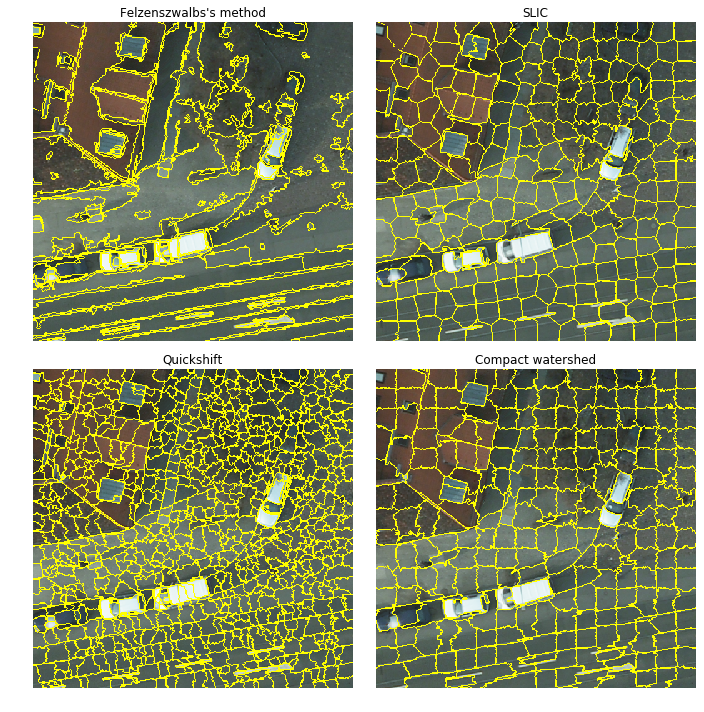

Max weight given to color space.
Felzenszwalb number of segments: 395
SLIC number of segments: 228
Quickshift number of segments: 1790
Compact Watershed number of segments: 256


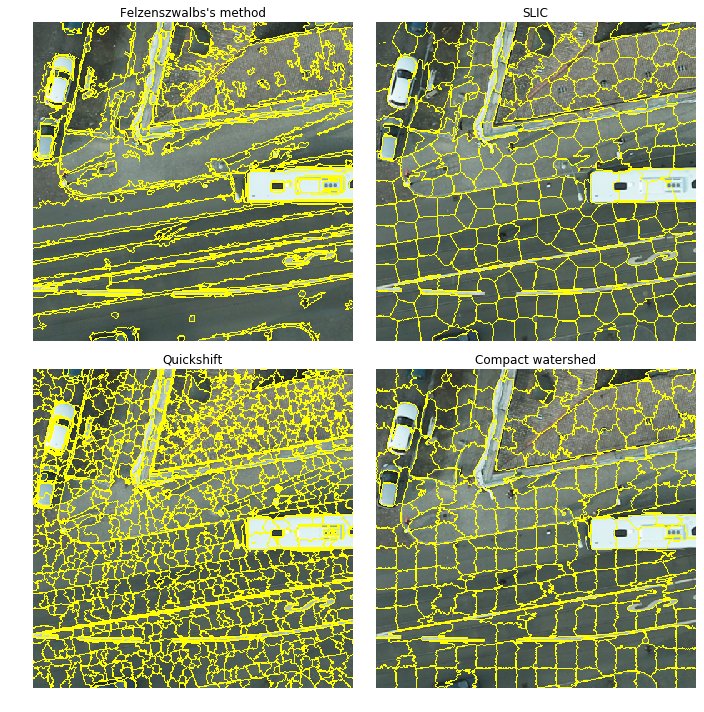

Max weight given to color distance.
Felzenszwalb number of segments: 332
SLIC number of segments: 230
Quickshift number of segments: 2191
Compact Watershed number of segments: 256


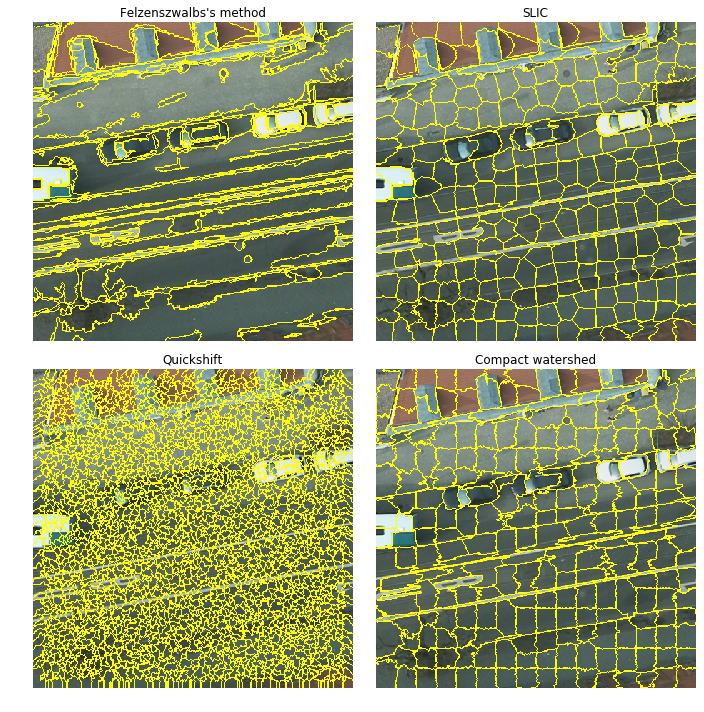

In [0]:
f_scale = 100
f_sigma = 0.50
f_min_size = 50
slic_segments = 250
slic_compactness = 10
slic_sigma = 1
quick_size = 3
quick_dist = 6
quick_ratio = .5
w_markers = 250
w_compactness = 0.001

for i in range(0,3):
    if i == 0:
      print("Equal weight given to color space and distance.")
      segment_image(image[i],f_scale,f_sigma,f_min_size,slic_segments,slic_compactness,slic_sigma,quick_size,quick_dist,quick_ratio,w_markers,w_compactness)
    if i == 1:
      print("Max weight given to color space.")
      quick_ratio = 1
      segment_image(image[i],f_scale,f_sigma,f_min_size,slic_segments,slic_compactness,slic_sigma,quick_size,quick_dist,quick_ratio,w_markers,w_compactness)
    if i == 2:
      print("Max weight given to color distance.")
      quick_ratio = 0
      segment_image(image[i],f_scale,f_sigma,f_min_size,slic_segments,slic_compactness,slic_sigma,quick_size,quick_dist,quick_ratio,w_markers,w_compactness)